# **Flight Price- Prediction Project**

# **Problem Statement:-**
This project contains three phases:-

**Data Collection Phase:-**

WE have to scrape at least 1500 rows of data. We can scrape more data as well, it’s up to us, More the data better the model.In this section we have to scrape the data of flights from different websites. The number of columns for data doesn’t have limit, it’s up to us and our creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. We can make changes to it, we can add or we can remove some columns, it completely depends on the website from which we are fetching the data.

**Data Analysis Phase:-**

After cleaning the data, we have to do some analysis on the data. Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are morning flights expensive?

**Model Building Phase:-**

After collecting the data, we need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model.

Follow the complete life cycle of data science. Include all the steps like.

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best model

**Business Goal:-**

First we need to collect flight price data from different websites using web scraping techniques and then need to build a machine learning model.

Target Variable:- Target Variable is Price in this project and it is continuous in nature so we will use Regression algorithms to make our model.

**DataSet Information:-**

1- Airline

2-Journey_date

3-Source

4-Destination

5-Departure Time

6-Arrival Time

7-Stops

8-Price

**Steps used in this project:-**

1- Define the Problem

2- Data Gathering

3- Data Cleaning

4- Data Exploration and Visualization

5- Train the algorithm

6- Evaluate our model using evaluation metrics & etc.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/Python_Datasets/Flight_Price_Scrapped_Data.csv')
df

,Unnamed: 0,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,1,Spicejet,15/10/2021,Goa,Ahmedabad,14:50,17:00,Non stop,5315.0
1,2,Go First,15/10/2021,Goa,Ahmedabad,15:40,17:10,Non stop,5315.0
2,3,Spicejet,15/10/2021,Goa,Ahmedabad,19:40,21:40,Non stop,5315.0
3,4,Go First,15/10/2021,Goa,Ahmedabad,20:25,22:05,Non stop,5315.0
4,5,Go First,15/10/2021,Goa,Ahmedabad,16:15,21:05,1 stop via Mumbai,5315.0
...,...,...,...,...,...,...,...,...,...
2290,2291,"IndiGo, Go First",17/10/2021,Kolkata,Goa,08:35,15:10,1 stop via Bengaluru,13871.0
2291,2292,"Spicejet, Go First",17/10/2021,Kolkata,Goa,08:50,15:10,1 stop via Bengaluru,13975.0
2292,2293,Go First,17/10/2021,Kolkata,Goa,05:30,11:40,1 stop via Jaipur,15640.0
2293,2294,Vistara,17/10/2021,Kolkata,Goa,07:10,13:50,1 stop via New Delhi,17934.0


In [3]:
#Removing Column "Unnamed:0 as it will not affect our core dataset
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,Spicejet,15/10/2021,Goa,Ahmedabad,14:50,17:00,Non stop,5315.0
1,Go First,15/10/2021,Goa,Ahmedabad,15:40,17:10,Non stop,5315.0
2,Spicejet,15/10/2021,Goa,Ahmedabad,19:40,21:40,Non stop,5315.0
3,Go First,15/10/2021,Goa,Ahmedabad,20:25,22:05,Non stop,5315.0
4,Go First,15/10/2021,Goa,Ahmedabad,16:15,21:05,1 stop via Mumbai,5315.0
...,...,...,...,...,...,...,...,...
2290,"IndiGo, Go First",17/10/2021,Kolkata,Goa,08:35,15:10,1 stop via Bengaluru,13871.0
2291,"Spicejet, Go First",17/10/2021,Kolkata,Goa,08:50,15:10,1 stop via Bengaluru,13975.0
2292,Go First,17/10/2021,Kolkata,Goa,05:30,11:40,1 stop via Jaipur,15640.0
2293,Vistara,17/10/2021,Kolkata,Goa,07:10,13:50,1 stop via New Delhi,17934.0


In [4]:
#Shape of our Dataset after removal of 3 Columns
print("Shape of our dataset is ",df.shape)
print("Column count in our dataset is",df.shape[1])
print("Row count in our dataset is ",df.shape[0])

Shape of our dataset is  (2295, 8)
Column count in our dataset is 8
Row count in our dataset is  2295


In [5]:
#Let's check type of data in our Dataset
df.dtypes

Airline          object
Journey_date     object
From             object
To               object
Dtime            object
Atime            object
Stops            object
Price           float64
dtype: object

In [6]:
#Checking null values in Dataset
print("Empty cells in Dataset is ",df.isna().values.any())
print("\nColumnwise Empty cell analysis\n")
print(df.isna().sum())
print("\nPlease see the detail below:-")
df.isna()

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64

Please see the detail below:-


,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2290,False,False,False,False,False,False,False,False
2291,False,False,False,False,False,False,False,False
2292,False,False,False,False,False,False,False,False
2293,False,False,False,False,False,False,False,False


In [7]:
#Let's check our columns in detail
df.columns

Index(['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops',
       'Price'],
      dtype='object')

In [8]:
#Concise Summary of our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       2295 non-null   object 
 1   Journey_date  2295 non-null   object 
 2   From          2295 non-null   object 
 3   To            2295 non-null   object 
 4   Dtime         2295 non-null   object 
 5   Atime         2295 non-null   object 
 6   Stops         2295 non-null   object 
 7   Price         2295 non-null   float64
dtypes: float64(1), object(7)
memory usage: 143.6+ KB


In [9]:
#Let's check unique values in each column to exolre dataset more deeply
print("Column-wise Unique values are as:-")
for column in df.columns.values:
    print("\n Unique values in ",column," column is " ,df[column].nunique())

Column-wise Unique values are as:-

 Unique values in  Airline  column is  36

 Unique values in  Journey_date  column is  17

 Unique values in  From  column is  4

 Unique values in  To  column is  9

 Unique values in  Dtime  column is  147

 Unique values in  Atime  column is  180

 Unique values in  Stops  column is  43

 Unique values in  Price  column is  542


In [10]:
#checking size of dataFrame
df.size

18360

In [11]:
#Let's check value count of object datatype columns
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

IndiGo                 1070
Go First                383
AirAsia                 329
Spicejet                176
Air India               106
Vistara                  72
Go First, IndiGo         13
AirAsia, IndiGo          11
IndiGo, Go First         10
IndiGo, Air India        10
Spicejet, AirAsia        10
Spicejet, IndiGo          9
Vistara, Go First         8
Go First, AirAsia         8
IndiGo, Spicejet          8
Vistara, IndiGo           7
IndiGo, AirAsia           7
Go First, Air India       7
AirAsia, Spicejet         7
Air India, IndiGo         6
Go First, Spicejet        6
Spicejet, Go First        5
AirAsia, Go First         4
Vistara, Air India        4
Air India, AirAsia        3
Air India, Spicejet       2
Vistara, AirAsia          2
Air India, Go First       2
Spicejet, TruJet          2
Go First, TruJet          2
Vistara, Spicejet         1
AirAsia, TruJet           1
Spicejet, Air India       1
Air India, Vistara        1
AirAsia, Air India        1
IndiGo, Vistara     

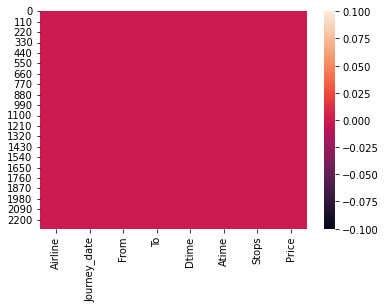

In [12]:
#To check missing values using Seaborn Heatmap
sns.heatmap(df.isnull())

# **Data Visualization**

**Univariate Analysis**

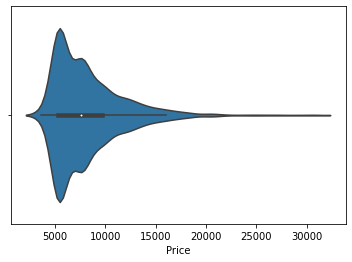

In [13]:
#Let's explore our target variable "Price" using violinPlot
sns.violinplot(df['Price'])
plt.show()

In [14]:
#checking its value_counts
df['Price'].value_counts()

5316.0     199
5315.0     168
7622.0     131
7626.0     127
5060.0     101
          ... 
30560.0      1
8003.0       1
15615.0      1
15143.0      1
17601.0      1
Name: Price, Length: 542, dtype: int64

**Maximum number of flight Prices range between 5316-5060.**

# **Exploring Input Features**

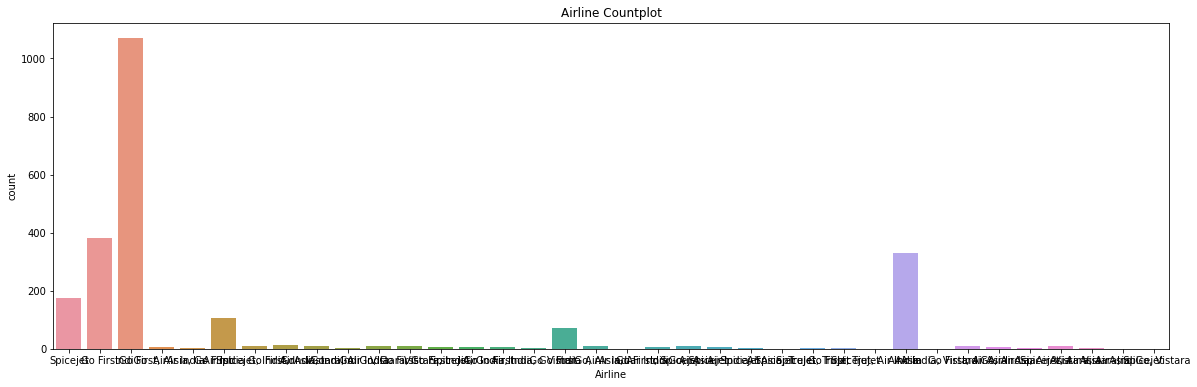

In [17]:
#Let's explore "Airline" feature
plt.subplots(figsize=(20,6))
sns.countplot(x="Airline", data=df)
plt.title("Airline Countplot")
plt.xlabel('Airline')
plt.ylabel("count")
plt.show()

In [18]:
df['Airline'].value_counts()

IndiGo                 1070
Go First                383
AirAsia                 329
Spicejet                176
Air India               106
Vistara                  72
Go First, IndiGo         13
AirAsia, IndiGo          11
IndiGo, Go First         10
IndiGo, Air India        10
Spicejet, AirAsia        10
Spicejet, IndiGo          9
Vistara, Go First         8
Go First, AirAsia         8
IndiGo, Spicejet          8
Vistara, IndiGo           7
IndiGo, AirAsia           7
Go First, Air India       7
AirAsia, Spicejet         7
Air India, IndiGo         6
Go First, Spicejet        6
Spicejet, Go First        5
AirAsia, Go First         4
Vistara, Air India        4
Air India, AirAsia        3
Air India, Spicejet       2
Vistara, AirAsia          2
Air India, Go First       2
Spicejet, TruJet          2
Go First, TruJet          2
Vistara, Spicejet         1
AirAsia, TruJet           1
Spicejet, Air India       1
Air India, Vistara        1
AirAsia, Air India        1
IndiGo, Vistara     

**Indigo,Go First & AirAsia are most popular brands.**

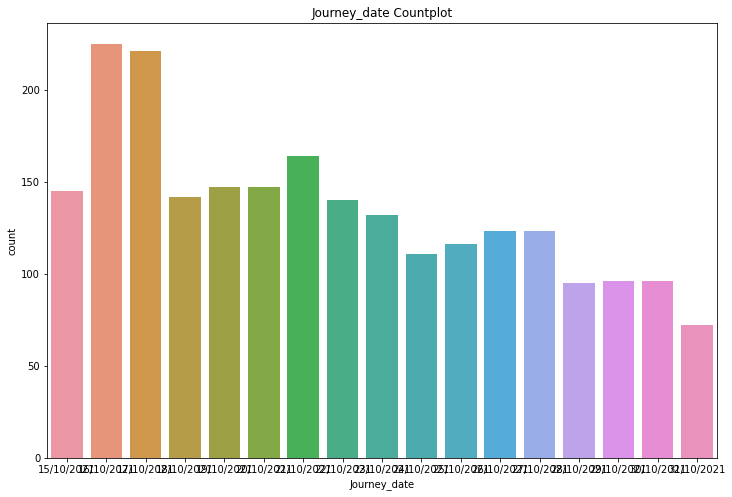

In [19]:
#Let's explore "Journey_date" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Journey_date", data=df)
plt.title("Journey_date Countplot")
plt.xlabel('Journey_date')
plt.ylabel("count")
plt.show()

In [20]:
df['Journey_date'].value_counts()

16/10/2021    225
17/10/2021    221
21/10/2021    164
19/10/2021    147
20/10/2021    147
15/10/2021    145
18/10/2021    142
22/10/2021    140
23/10/2021    132
27/10/2021    123
26/10/2021    123
25/10/2021    116
24/10/2021    111
30/10/2021     96
29/10/2021     96
28/10/2021     95
31/10/2021     72
Name: Journey_date, dtype: int64

**16-10-2021 & 17-10-2021 dates have maximum bookings and 31-10-2021 have minimum bookings.**

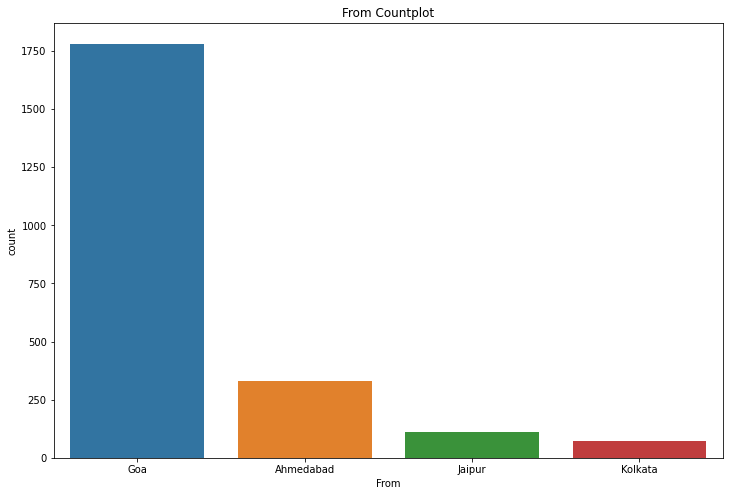

In [21]:
#Let's explore "From" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="From", data=df)
plt.title("From Countplot")
plt.xlabel('From')
plt.ylabel("count")
plt.show()

In [22]:
df['From'].value_counts()

Goa          1781
Ahmedabad     331
Jaipur        109
Kolkata        74
Name: From, dtype: int64

**For source, Maximum bookings done from Goa and minimum bookings done from kolkata.**

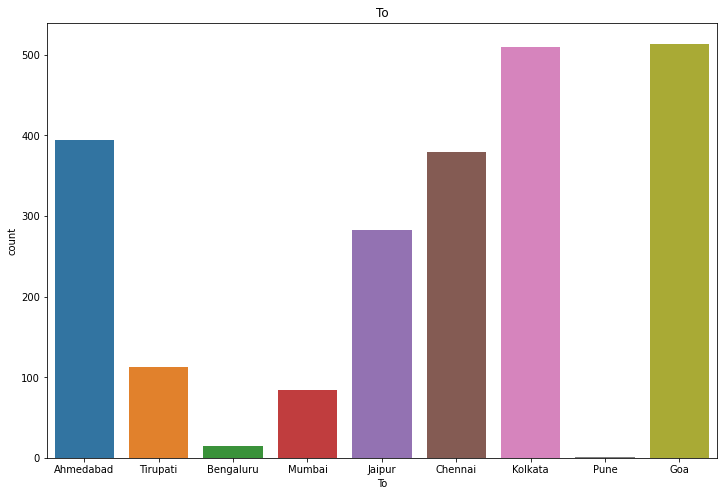

In [23]:
#Let's explore "To" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="To", data=df)
plt.title("To")
plt.xlabel('To')
plt.ylabel("count")
plt.show()

In [24]:
df['To'].value_counts()

Goa          514
Kolkata      510
Ahmedabad    395
Chennai      380
Jaipur       283
Tirupati     113
Mumbai        84
Bengaluru     15
Pune           1
Name: To, dtype: int64

**For Destination, Maximum bookings done for Goa & minimum bookings done for Pune.**

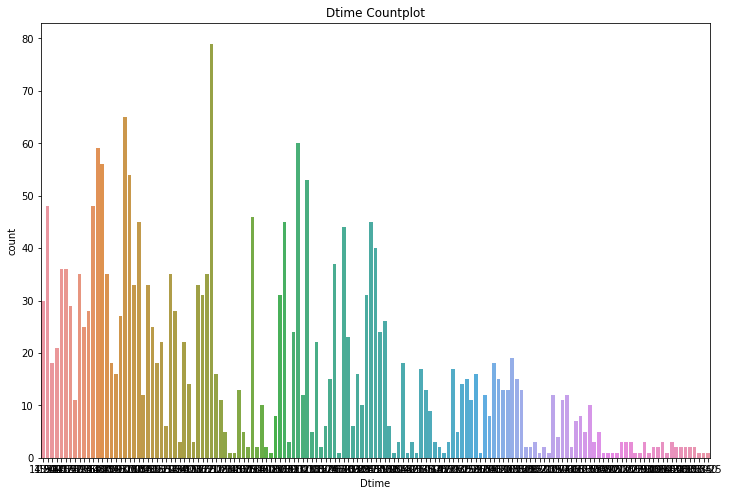

In [25]:
#Let's explore "Dtime" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Dtime", data=df)
plt.title("Dtime Countplot")
plt.xlabel('Dtime')
plt.ylabel("count")
plt.show()

In [26]:
df['Dtime'].value_counts()

12:10    79
09:15    65
09:00    60
16:30    59
14:40    56
         ..
09:20     1
19:00     1
20:35     1
20:10     1
05:25     1
Name: Dtime, Length: 147, dtype: int64

**Most of the Flight departed at 12:10 & in night very few flights departed.**

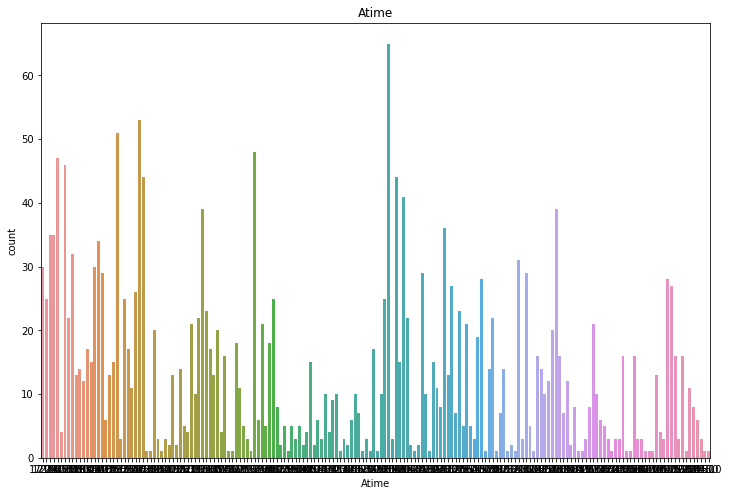

In [27]:
#Let's explore "Atime" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Atime", data=df)
plt.title("Atime")
plt.xlabel('Atime')
plt.ylabel("count")
plt.show()

In [28]:
df['Atime'].value_counts()

23:15    65
06:50    53
17:15    51
19:25    48
21:05    47
         ..
08:25     1
23:45     1
06:10     1
07:55     1
00:10     1
Name: Atime, Length: 180, dtype: int64

**Maximum flights arrived at 23:15 & less flights arrived in morning.**

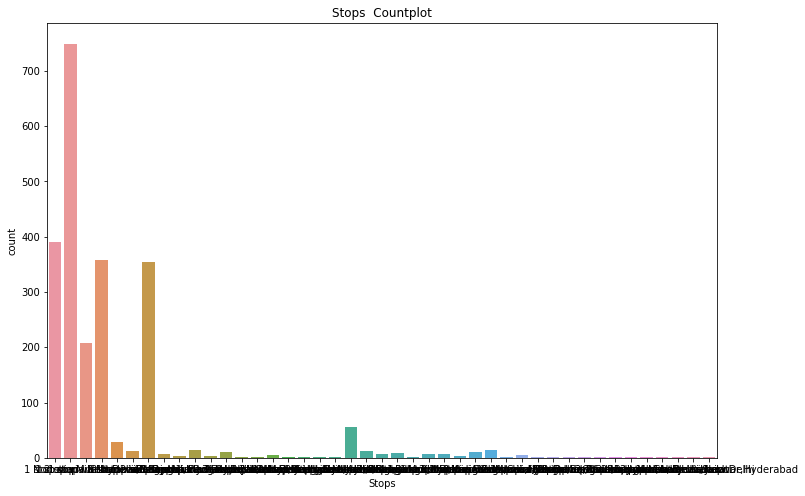

In [29]:
#Let's explore "Stops" feature
plt.subplots(figsize=(12,8))
sns.countplot(x="Stops", data=df)
plt.title("Stops  Countplot")
plt.xlabel('Stops')
plt.ylabel("count")
plt.show()

In [30]:
df['Stops'].value_counts()

1 stop via Mumbai                               749
Non stop                                        390
1 stop via Hyderabad                            357
1 stop via Bengaluru                            354
1 stop via New Delhi                            207
1 stop via Ahmedabad                             55
2 stop via Mumbai,Bengaluru                      29
2 stop via Ahmedabad,Jaipur                      15
2 stop via Mumbai,Hyderabad                      14
2 stop via Hyderabad,Bengaluru                   13
1 stop via Nagpur                                12
2 stop via New Delhi,Mumbai                      11
1 stop via Chennai                               11
2 stop via Bengaluru,Mumbai                       8
2 stop via Mumbai,New Delhi                       7
3 stop via Mumbai,Bengaluru,Hyderabad             7
1 stop via Kannur                                 6
1 stop via Indore                                 6
2 stop via Surat,Hyderabad                        5
2 stop via M

**Most of the flights have stoppage at Mumbai and many flights are non stop.**

# **Bivariate Analysis**

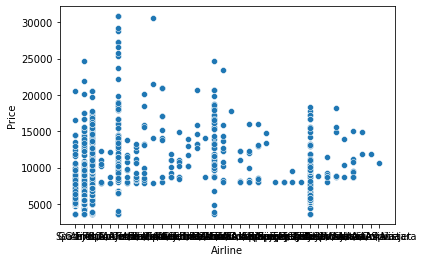

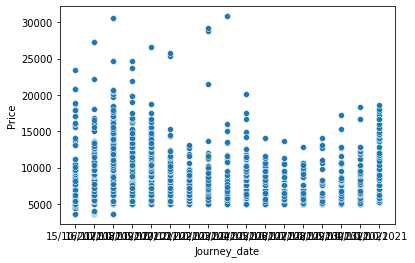

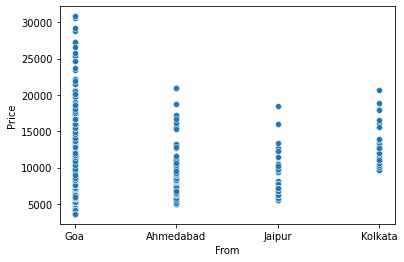

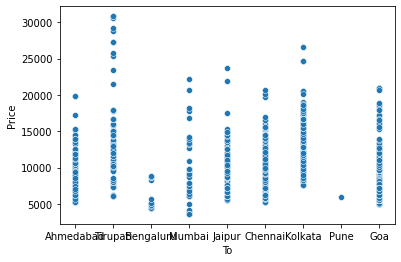

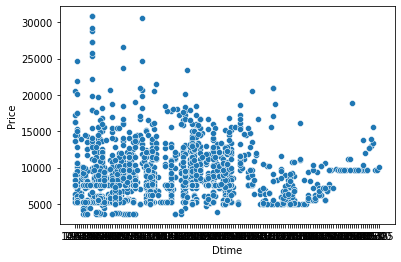

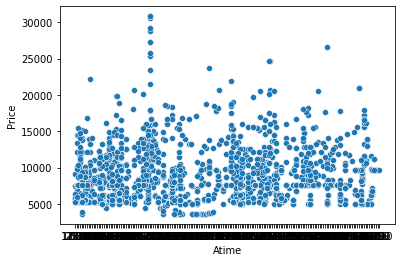

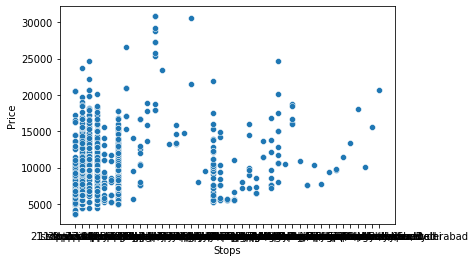

In [31]:
#Scatter Plots between output & Input variables
out_var=df['Price']
input_var=df.drop(['Price'],axis=1)
for i in input_var.columns:
    plt.subplots()
    sns.scatterplot(input_var[i],out_var)


In [32]:
#making different lists for categorical & continuous variables
category_features=[x for x in df.columns if df[x].dtype==object]
cont_features=[x for x in df.columns if x not in category_features]
list(category_features)

['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops']

In [33]:
#Continuous list
list(cont_features)

['Price']

<Figure size 1512x1008 with 0 Axes>

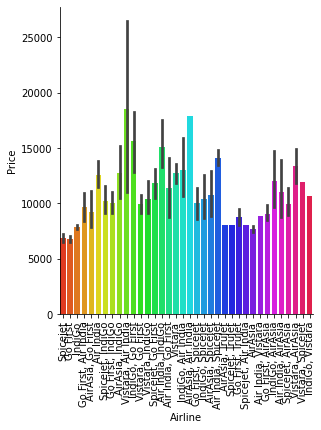

<Figure size 1512x1008 with 0 Axes>

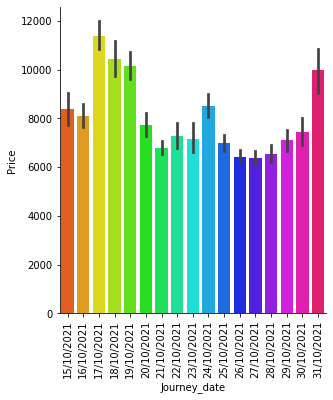

<Figure size 1512x1008 with 0 Axes>

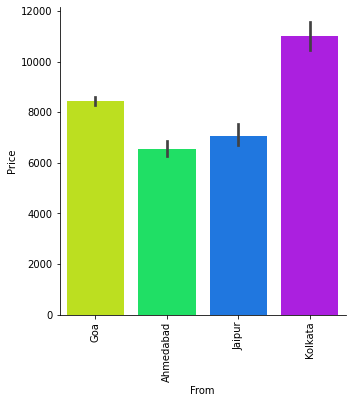

<Figure size 1512x1008 with 0 Axes>

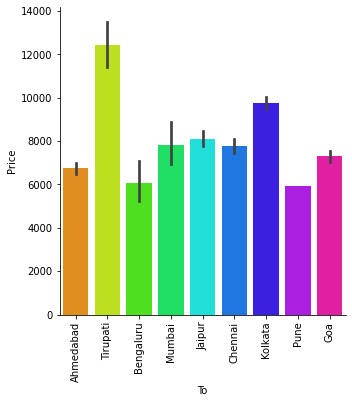

<Figure size 1512x1008 with 0 Axes>

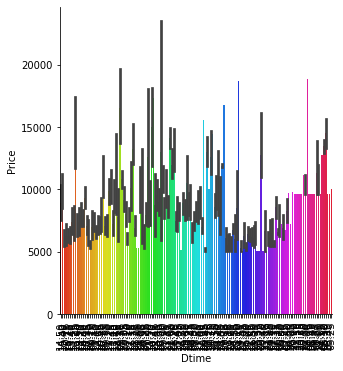

<Figure size 1512x1008 with 0 Axes>

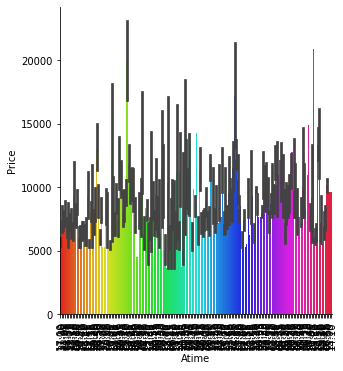

<Figure size 1512x1008 with 0 Axes>

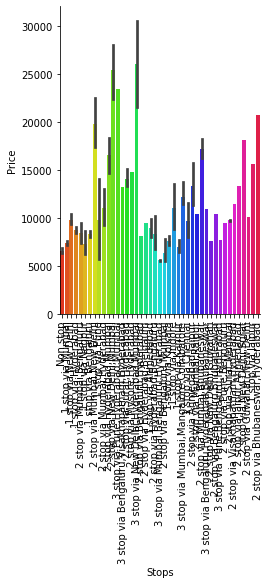

In [34]:
#Catplot between output feature & categorical input feartures
for i in category_features:
    plt.figure(figsize=(21,14))
    sns.catplot(y='Price',x=i,data=df,kind="bar",palette="hsv")
    plt.xticks(rotation=90)
    plt.show()

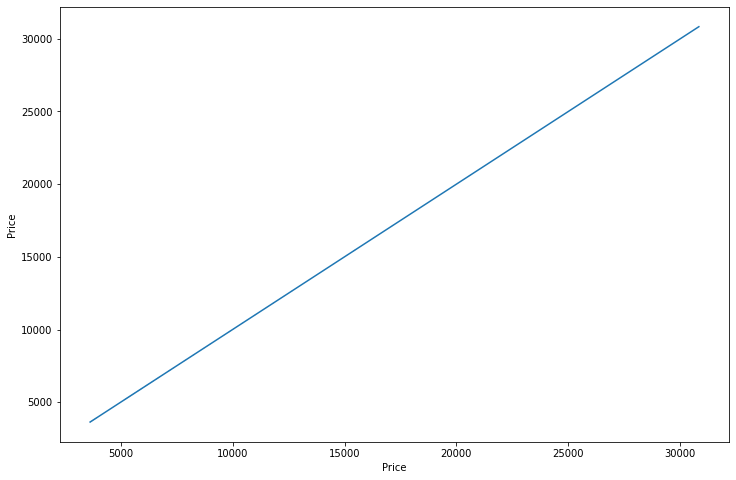

In [35]:
#Lineplot between output feature & Continuous input feartures
for i in cont_features:
    plt.figure(figsize=(12,8))
    sns.lineplot(y='Price',x=i,data=df)
    plt.show()

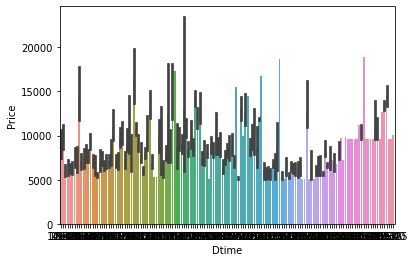

In [36]:
#Lets chcek when the averge price of the flights on basis of departure timing
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Dtime",y="Price",data=df)
plt.show()

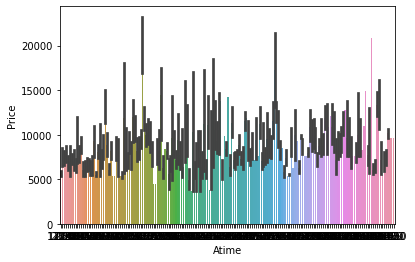

In [37]:
#Lets chcek when the averge price of the flights on basis of Arrival timing
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x="Atime",y="Price",data=df)
plt.show()

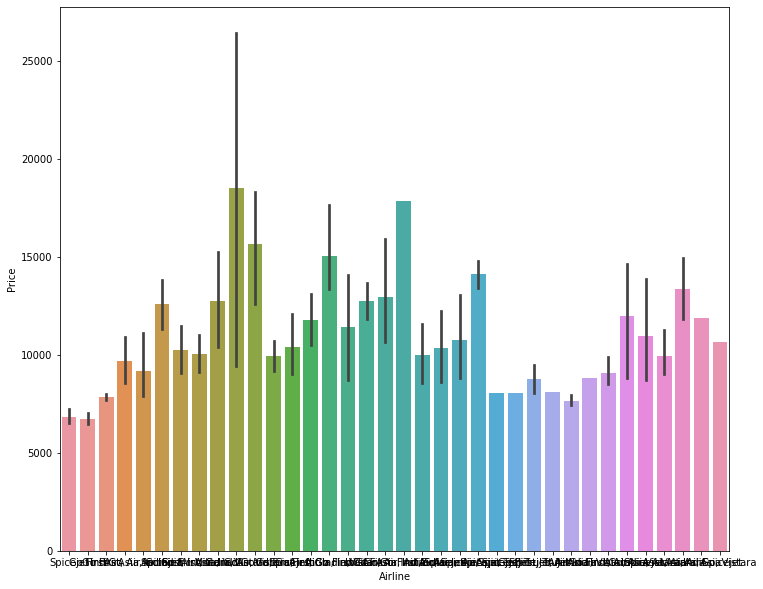

In [38]:
#lets check which airline is expensive based on average price
plt.figure(figsize=(12,10))
sns.barplot(x="Airline",y="Price",data=df)
plt.show()

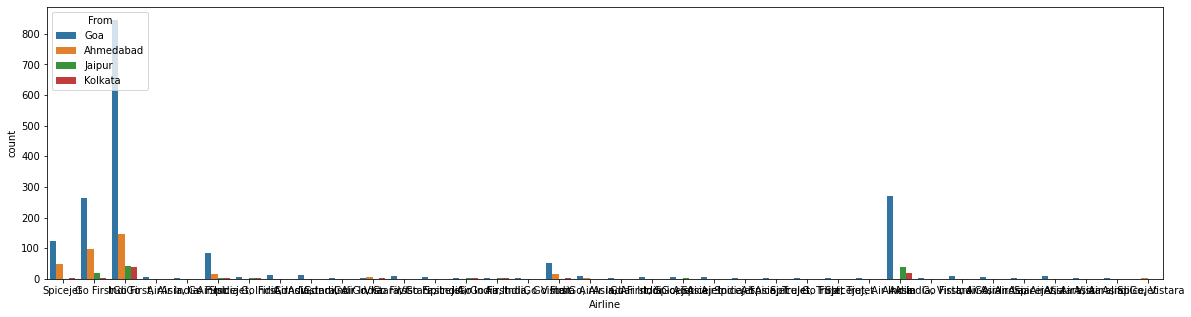

In [39]:
#Lets chcek the most popular flight region wise (Source)
plt.figure(figsize=(20,5))
sns.countplot(x="Airline",hue="From",data=df)
plt.show()

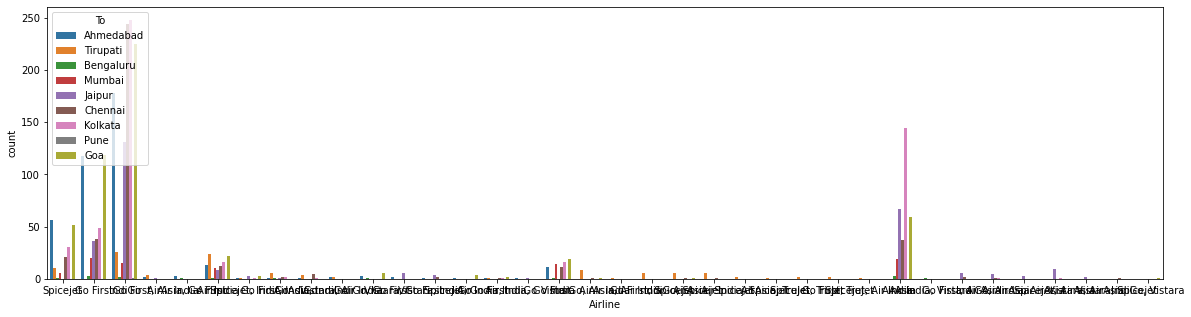

In [40]:
#Lets chcek the most popular flight region wise (Destination)
plt.figure(figsize=(20,5))
sns.countplot(x="Airline",hue="To",data=df)
plt.show()

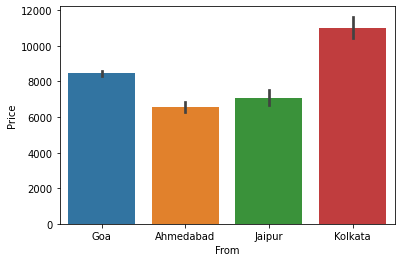

In [41]:
#Lets chcek from which region averge price of the flight was more
sns.barplot(x="From",y="Price",data=df)
plt.show()

**1- Maximum Price for flight booking when kolkata is source city.**

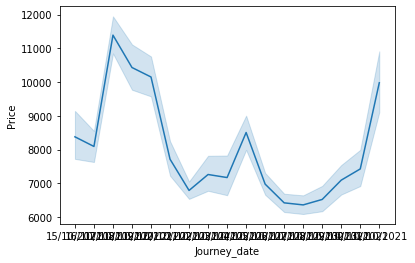

In [42]:
#lets draw a line plot between Journey_date and price
sns.lineplot(x="Journey_date",y="Price",data=df)
plt.show()

# **Feature Engineering**

In [43]:
#Encoding categorical data in to numerical format for better processing using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i].astype(str))

In [44]:
#Concise Summary of our DataFrame after Feature Engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295 entries, 0 to 2294
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       2295 non-null   int64  
 1   Journey_date  2295 non-null   int64  
 2   From          2295 non-null   int64  
 3   To            2295 non-null   int64  
 4   Dtime         2295 non-null   int64  
 5   Atime         2295 non-null   int64  
 6   Stops         2295 non-null   int64  
 7   Price         2295 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 143.6 KB


# **Histogram of individual features**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e8260b650>,
      dtype=object)

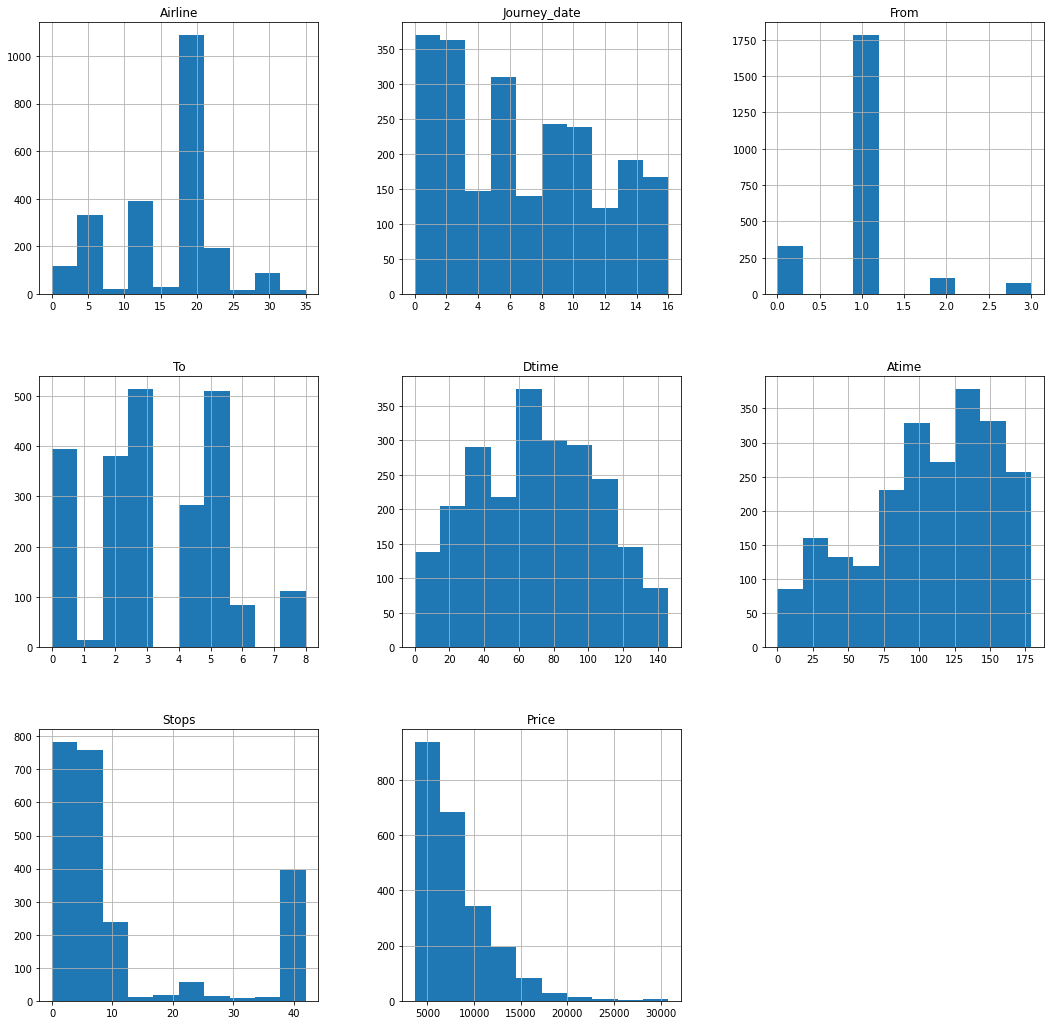

In [45]:
# histogram of individual feature using hist function
df.hist(figsize=(18,18),grid=True)

***Observation:***

Presence of unusual values in above histograms & also distribution is not normal in some columns and these things denote the possibility of potential outliers.

# **Multivariate Analysis**

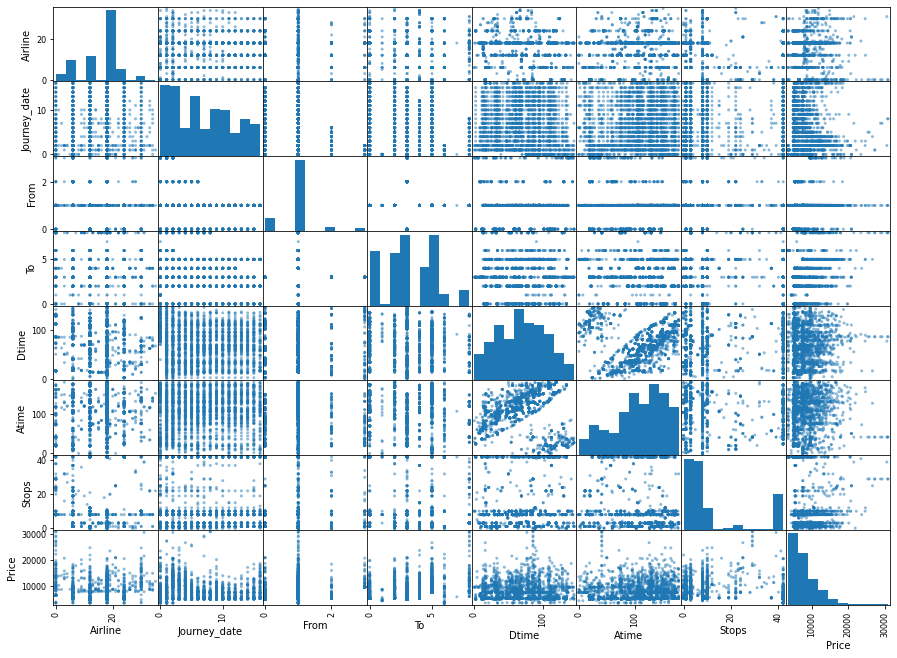

In [46]:
#Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(15,11),grid=True)
plt.show()

**Observation:**

Using multivariate analysis we can look at the interactions between the variables.Scatterplots of all pair of attributes helps us to spot structured relationship between input variables.

# **SUMMARY STATISTICS**

In [47]:
#Lets describe the dataset
df.describe()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
count,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000
mean,15.334641,6.795207,0.967756,3.230501,69.849673,106.884967,12.832680,8188.997821
std,6.893732,4.749329,0.565506,2.066154,35.430133,46.441335,14.319613,3558.418345
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3635.000000
25%,12.000000,2.000000,1.000000,2.000000,37.000000,76.000000,3.000000,5316.000000
50%,18.000000,6.000000,1.000000,3.000000,69.000000,111.000000,8.000000,7622.000000
75%,18.000000,11.000000,1.000000,5.000000,96.000000,144.000000,10.000000,9639.000000
max,35.000000,16.000000,3.000000,8.000000,146.000000,179.000000,42.000000,30832.000000


In [48]:
#checking Transpose of Statistical summary to get better understanding:-
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Airline,2295.0,15.334641,6.893732,0.0,12.0,18.0,18.0,35.0
Journey_date,2295.0,6.795207,4.749329,0.0,2.0,6.0,11.0,16.0
From,2295.0,0.967756,0.565506,0.0,1.0,1.0,1.0,3.0
To,2295.0,3.230501,2.066154,0.0,2.0,3.0,5.0,8.0
Dtime,2295.0,69.849673,35.430133,0.0,37.0,69.0,96.0,146.0
Atime,2295.0,106.884967,46.441335,0.0,76.0,111.0,144.0,179.0
Stops,2295.0,12.832680,14.319613,0.0,3.0,8.0,10.0,42.0
Price,2295.0,8188.997821,3558.418345,3635.0,5316.0,7622.0,9639.0,30832.0


**Observations:**

1- For input features, Arrival Time has highest standard deviation of 46.44.

2- Maximum Price of flight is 30832.0 and minimum price is 3635.0.

3- In input features Journey_Date,Destination,Departure Timing & Stops,the value of mean is considerably greater than median so there are strong chances of positive skewness.

4- In remaining input columns, value of median is greater than mean so the columns are negatively skewed.

**Correlation Matrix**

In [49]:
#Let's check correlation in our Dataset
dfcor=df.corr()
dfcor

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
Airline,1.000000,0.031479,-0.100328,-0.140966,-0.101788,0.106182,0.131230,-0.006864
Journey_date,0.031479,1.000000,-0.235533,-0.144628,-0.070290,0.090969,-0.026124,-0.231090
From,-0.100328,-0.235533,1.000000,0.006364,0.037571,-0.013603,-0.188970,0.181667
To,-0.140966,-0.144628,0.006364,1.000000,-0.027008,-0.093840,-0.135926,0.343561
Dtime,-0.101788,-0.070290,0.037571,-0.027008,1.000000,0.122771,0.132112,0.027242
Atime,0.106182,0.090969,-0.013603,-0.093840,0.122771,1.000000,-0.081600,0.002319
Stops,0.131230,-0.026124,-0.188970,-0.135926,0.132112,-0.081600,1.000000,-0.105198
Price,-0.006864,-0.231090,0.181667,0.343561,0.027242,0.002319,-0.105198,1.000000


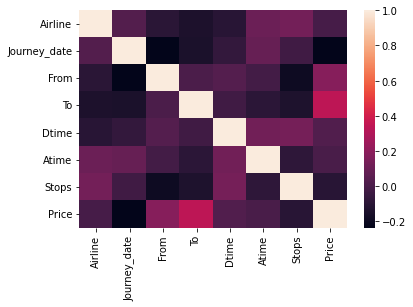

In [50]:
#checking correlation using Heatmap
sns.heatmap(dfcor)

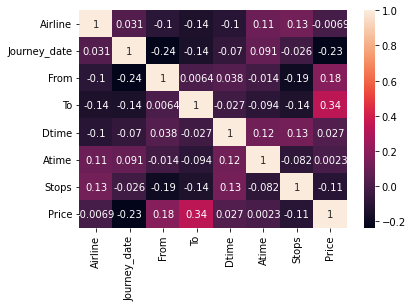

In [51]:
#Heatmap with annotations & color_palette
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,annot=True)

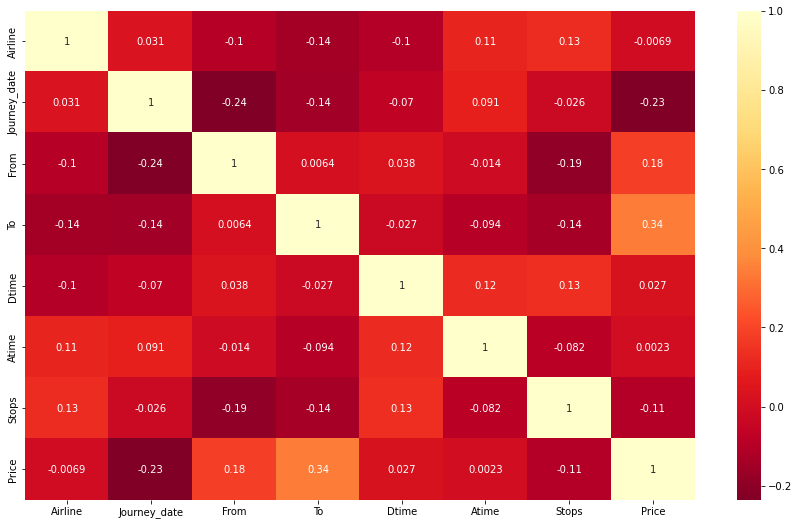

In [52]:
plt.figure(figsize=(15,9))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

**Observations:-**

1- Price is highly correlated with Source & Destination columns.

2- Price is negatively correlated with journey_Date & Stops column.

**Correlation between input and output variable "Price"**

Text(0.5, 1.0, 'correaltion between input & target feature')

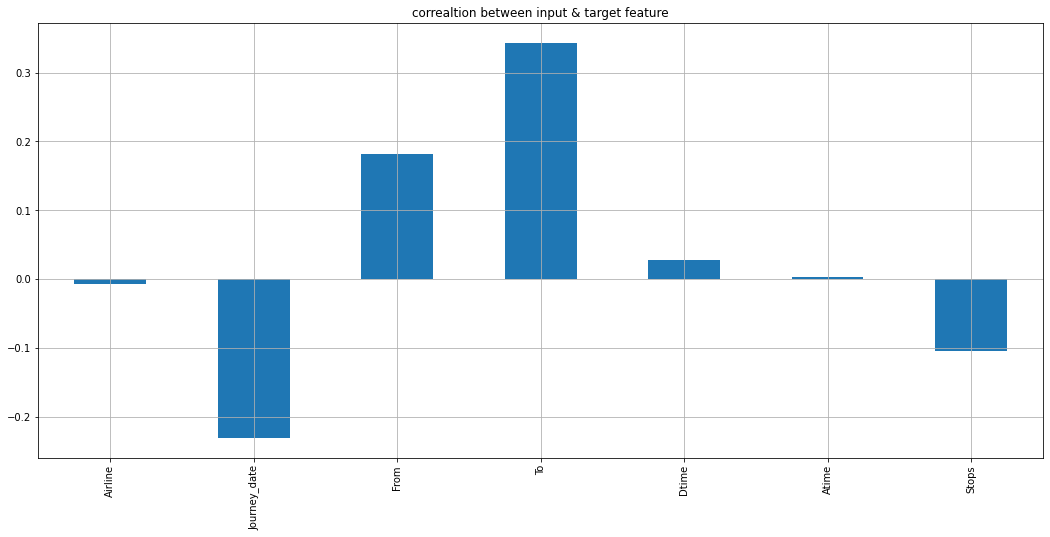

In [53]:
#Let's check correlation between input & output variable
plt.figure(figsize=(18,8))
df.drop('Price', axis=1).corrwith(df['Price']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("correaltion between input & target feature")

**Observation:**

1- Destination column is most positively correlated with Price column.

2- Journey_Date column is most negatively correlated with Price column.

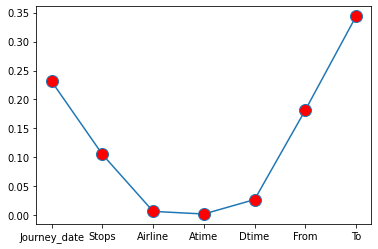

In [54]:
#checking highly correlated values with Output variable Price
abs(df.corr().loc['Price'].drop('Price').sort_values()).plot(marker='o',markerfacecolor='red',markersize=12)
plt.show()

# **Plotting Outliers**

Airline           AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
Journey_date    AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
From            AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
To              AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Dtime           AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
Atime           AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
Stops           AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
Price           AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
dtype: object

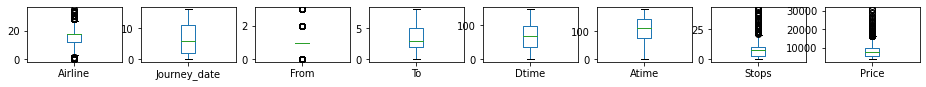

In [55]:
#Univariate Analysis(Boxplot)
df.plot(kind='box',subplots=True,layout=(10,8),figsize=(16,12))

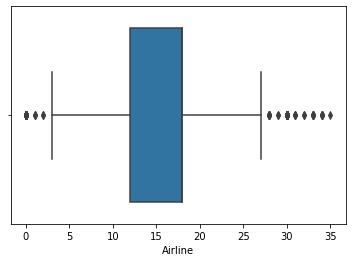

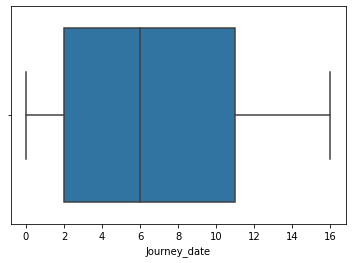

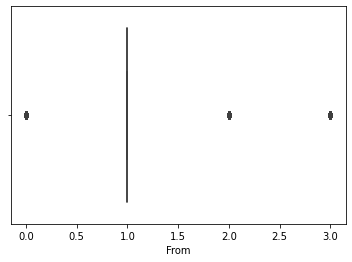

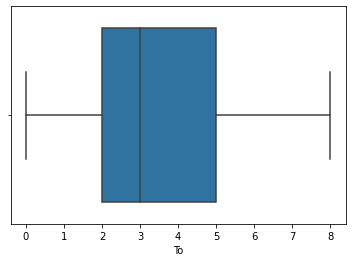

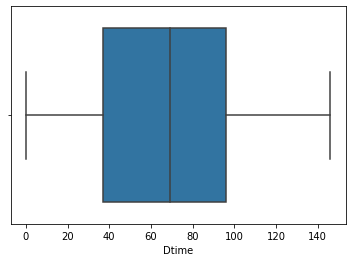

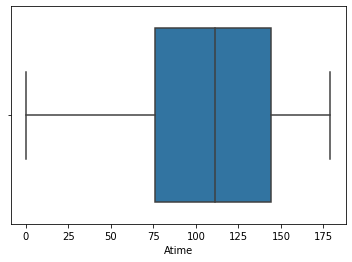

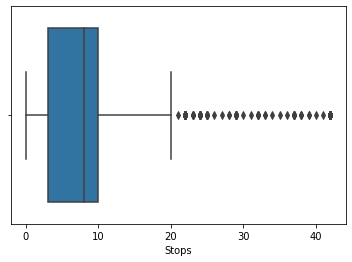

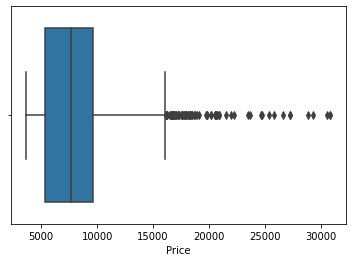

In [56]:
#checking boxplots column wise
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

**Observation:**

Outliers are present in various columns.

**To check Distribution of Skewness**

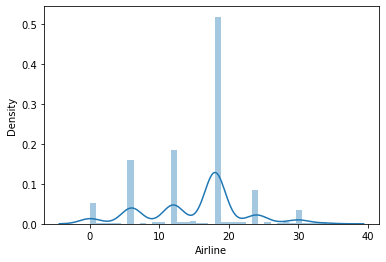

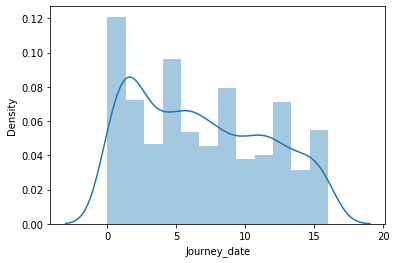

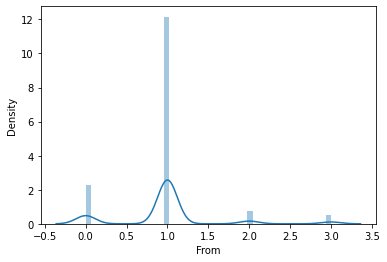

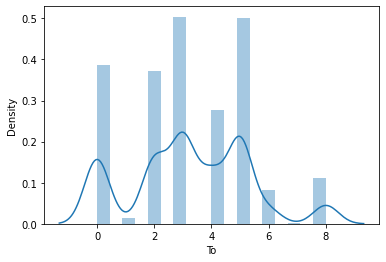

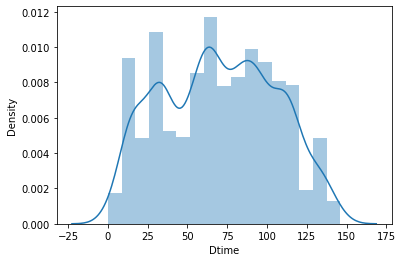

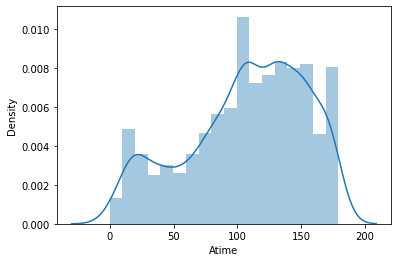

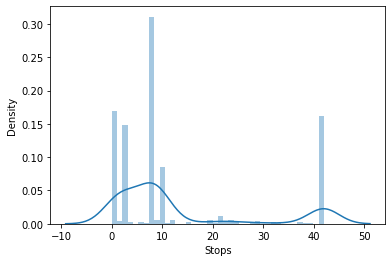

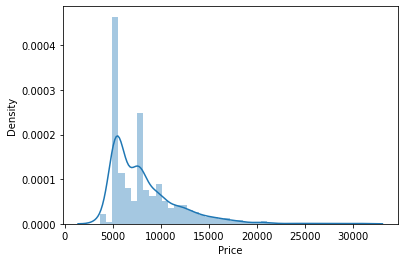

In [57]:
#Distplot for individual columns
for i in df.columns:
    plt.subplots()
    sns.distplot(df[i],label = i)

**Observation:**

Skewness is present in various columns.

**Removing Outliers**

In [58]:
#Let's remove the outliers using z scores
from scipy.stats import zscore
zs=np.abs(zscore(df))
print(zs.shape)

(2295, 8)


In [59]:
#checking which data have zscore more than 3
print(np.where(zs>3))

(array([  92,   93,  403,  414,  415,  431,  456,  457,  491,  492,  493,
        506,  507,  576,  606,  687,  688,  952,  953,  954, 1343, 1344,
       1345, 1346, 1377, 1378, 1414, 1567, 1793, 1794, 1795, 2221, 2222,
       2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233,
       2234, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243,
       2244, 2245, 2246, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254,
       2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265,
       2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276,
       2277, 2278, 2279, 2280, 2281, 2282, 2283, 2284, 2285, 2286, 2287,
       2288, 2289, 2290, 2291, 2292, 2293, 2294, 2294]), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [60]:
#Dropping Outliers
df1=df.loc[(abs(zs)<3).all(axis=1)]
print(df1.shape)

(2190, 8)


**Observation:**

As per above shapes: 2295-2190=105 so 105 outliers are removed and data loss is nearly 4.5%.

In [61]:
#Lets divide dataset into input and output
x=df1.drop('Price',axis=1)
x.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops
0,24,0,1,0,80,104,42
1,12,0,1,0,89,106,42
2,24,0,1,0,116,153,42
3,12,0,1,0,124,157,42
4,12,0,1,0,94,147,8


In [62]:
print(x.shape)

(2190, 7)


In [63]:
#Output feature
y=df1['Price']
y.head()

0    5315.0
1    5315.0
2    5315.0
3    5315.0
4    5315.0
Name: Price, dtype: float64

In [64]:
print(y.shape)

(2190,)


# **Skewness**

In [65]:
#Lets chcek the skewness in input dataset
x.skew()

Airline        -0.217217
Journey_date    0.242910
From           -0.510973
To              0.113909
Dtime           0.011993
Atime          -0.569884
Stops           1.337083
dtype: float64

In [66]:
#Let's check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

1


In [67]:
#Lets treat above skewness using cube root transformation
for index in x.skew().index:
    if x.skew().loc[index] >0.55:
        x[index]=np.cbrt(x[index])

In [68]:
#lets again check the skewness
x.skew()

Airline        -0.217217
Journey_date    0.242910
From           -0.510973
To              0.113909
Dtime           0.011993
Atime          -0.569884
Stops           0.289137
dtype: float64

In [69]:
#Let's again check Number of features having skewness more than 0.55
print(len(x.skew().loc[x.skew()>0.55]))

0


# **Data Preprocessing**

In [70]:
#Lets do the preprocessing to bring features to common scale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x1=ss.fit_transform(x)
x1=pd.DataFrame(x1,columns=x.columns)
x1.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops
0,1.272531,-1.49245,0.229692,-1.543399,0.301768,-0.099654,1.708491
1,-0.500458,-1.49245,0.229692,-1.543399,0.560798,-0.056036,1.708491
2,1.272531,-1.49245,0.229692,-1.543399,1.337888,0.968982,1.708491
3,-0.500458,-1.49245,0.229692,-1.543399,1.568137,1.056218,1.708491
4,-0.500458,-1.49245,0.229692,-1.543399,0.704704,0.838129,-0.028658


In [71]:
#Input feature
x1.shape

(2190, 7)

# **Evaluate Some Algorithms (Regression)**

In [72]:
#Let's check coefficient of determination(r2_score) to find the proportion of the variance in the 
#dependent variable that is predictable from the independent variable.
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score
def maximumr2_score(rgn,x1,y):
    maximum_r_score =0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=r_state,test_size=0.20)
        rgn.fit(x_train,y_train)
        pred=rgn.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        if r2_scr>maximum_r_score:
            maximum_r_score=r2_scr
            final_r_state=r_state
    print('Maximum r2 score for final_r_state',final_r_state,'is',maximum_r_score)
    return final_r_state

In [73]:
# creating lists to store performance score
Rscore=[]
Cvscore=[]
Mse=[]
Mae=[]
Rmse=[]
model=['Linear Regression','k-nearest neighbors','Decision Tree Regression','Random Forest Regression','Ridge Regression','Lasso regression']

# **Linear Regression**

In [74]:
#For Linear Regression
from sklearn.linear_model import LinearRegression
lg=LinearRegression()
r_state=maximumr2_score(lg,x1,y)
print('Mean r2 score for linear Regression is:',cross_val_score(lg,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for linear Regression is',cross_val_score(lg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 56 is 0.22994714931787996
Mean r2 score for linear Regression is: -0.08858227625314434
	Best possible r2score is 1.0
Standard deviation in r2 score for linear Regression is 0.23759944748467804


In [75]:
#Cross Validation for Linear Regression
from sklearn import linear_model
print(cross_val_score(linear_model.LinearRegression(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(lg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(lg,x1,y,cv=5).mean()))*100)

[ 0.30308827 -0.24741723  0.071084   -0.26126468 -0.30840173]

Cross validation score is:  -0.08858227625314434


In [76]:
#Score & Error Metrics for Linear Regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=lg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.20657453079277388
Mean_Squared_Error = 7007713.918106605
Mean Absolute_Error = 2043.3671419812872
Root Mean Squared Error = 2647.2087031638825


**k-nearest neighbors**

In [77]:
#Let's try to do Regression based on k-nearest neighbors.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
neighbors={'n_neighbors':range(1,27)}
knreg=KNeighborsRegressor()

**GridSearchCV**

In GridSearchCV approach, machine learning model is evaluated for a range of hyperparameter values. This approach is called GridSearchCV, because it searches for best set of hyperparameters from a grid of hyperparameters values.

In [78]:
#using gridsearch CV to find the best parameters to use in k-nearest neighbors regression. 
gridknr=GridSearchCV(knreg,neighbors,cv=10)
gridknr.fit(x1,y)
gridknr.best_params_

{'n_neighbors': 21}

In [79]:
#r2 scores for k-nearest neighbors regression.
knreg=KNeighborsRegressor(n_neighbors=21)
r_state=maximumr2_score(knreg,x1,y)
print('Mean r2 score for KNN Regression is:',cross_val_score(knreg,x1,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for KNN Regression is:',cross_val_score(knreg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 85 is 0.4117648079244879
Mean r2 score for KNN Regression is: -0.09560894486006055
standard deviation in r2 score for KNN Regression is: 0.2977054183393651


In [80]:
#Cross Validation for KNeighborsRegressor
print(cross_val_score(KNeighborsRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(knreg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(knreg,x1,y,cv=5).mean()))*100)

[ 0.25169911 -0.83164876  0.18784508 -0.25151836 -0.42959975]

Cross validation score is:  -0.09560894486006055


In [81]:
#Score & Error Metrics for k-nearest neighbors regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=89,test_size=0.20)
y_pred=knreg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.3993538109362522
Mean_Squared_Error = 5775703.1960519375
Mean Absolute_Error = 1661.668514894542
Root Mean Squared Error = 2403.2692724811213


# **Decision Tree Regression**

In [82]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
r_state=maximumr2_score(dt,x1,y)
print('Mean r2 score for Decision Tree Regression is:',cross_val_score(dt,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Decision Tree Regression is',cross_val_score(dt,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 75 is 0.6089173754060004
Mean r2 score for Decision Tree Regression is: -0.4056372737016912
	Best possible r2score is 1.0
Standard deviation in r2 score for Decision Tree Regression is 0.3940960621262355


In [83]:
#Cross Validation for Decision Tree regression
print(cross_val_score(DecisionTreeRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(dt,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(dt,x1,y,cv=5).mean()))*100)

[ 0.15637401 -0.80314104 -0.33501651 -0.1464269  -0.93462408]

Cross validation score is:  -0.29413604556288586


In [84]:
#Score & Error Metrics for DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=80,test_size=0.20)
y_pred=dt.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.9083598077497701
Mean_Squared_Error = 900669.8847031964
Mean Absolute_Error = 267.2671232876712
Root Mean Squared Error = 949.0362926164606


# **Random Forest Regression**

In [85]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
r_state=maximumr2_score(rf,x1,y)
print('Mean r2 score for Random Forest Regression is:',cross_val_score(rf,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Random Forest Regression is',cross_val_score(rf,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 78 is 0.7581379368360704
Mean r2 score for Random Forest Regression is: -0.08963209932579153
	Best possible r2score is 1.0
Standard deviation in r2 score for Random Forest Regression is 0.5058786685239315


In [86]:
#Cross Validation for Random Forest Regression
print(cross_val_score(RandomForestRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(rf,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(rf,x1,y,cv=5).mean()))*100)

[ 0.56587727 -0.44379042  0.12918944  0.20924537 -0.92704574]

Cross validation score is:  -0.10183743982703494


In [87]:
#Score & Error Metrics for RandomForestRegressor
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=60,test_size=0.20)
y_pred=rf.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.9220785170756505
Mean_Squared_Error = 745381.4854232362
Mean Absolute_Error = 486.2696232876713
Root Mean Squared Error = 863.3547853711336


**Ridge Regression**

In [88]:
from sklearn.linear_model import RidgeCV
rg=RidgeCV()
r_state=maximumr2_score(rg,x1,y)
print('Mean r2 score for Ridge Regression is:',cross_val_score(rg,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Ridge Regression is',cross_val_score(rg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 56 is 0.2296762305561807
Mean r2 score for Ridge Regression is: -0.08755797134462015
	Best possible r2score is 1.0
Standard deviation in r2 score for Ridge Regression is 0.2375594671019635


In [89]:
#Cross Validation for Ridge Regression
print(cross_val_score(linear_model.RidgeCV(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(rg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(rg,x1,y,cv=5).mean()))*100)

[ 0.30440864 -0.24263986  0.07107758 -0.26185637 -0.30877984]

Cross validation score is:  -0.08755797134462015


In [90]:
#Score & Error Metrics for Ridge Regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=rg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.20655623862451422
Mean_Squared_Error = 7007875.478690528
Mean Absolute_Error = 2044.1094801208092
Root Mean Squared Error = 2647.239218259379


**Lasso regression**

In [91]:
#Using Lasso regression for a more accurate prediction.
from sklearn.linear_model import Lasso
lasso_reg=Lasso()

In [92]:
#using gridsearch CV to find the best parameters to use in Lasso regression. 
parameters={"alpha":[0.001,0.01,0.1,1]}
gsc=GridSearchCV(lasso_reg,parameters,cv=10)
gsc.fit(x1,y)
gsc.best_params_

{'alpha': 1}

In [93]:
#As we used lasso Regression so Let's check Max & mean r2score
lasso_reg=Lasso(alpha=1)
r_state=maximumr2_score(lasso_reg,x1,y)
print('Mean r2 score for Lasso Regression is',cross_val_score(lasso_reg,x1,y,cv=5,scoring='r2').mean())
print('standard deviation in r2 score for Lasso Regrssion is',cross_val_score(lasso_reg,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 56 is 0.22980090212477522
Mean r2 score for Lasso Regression is -0.08862109648680627
standard deviation in r2 score for Lasso Regrssion is 0.2377563208156455


In [94]:
#Cross Validation for Lasso regression
print(cross_val_score(linear_model.Lasso(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(lasso_reg,x1,y,cv=5).mean()))
Cvscore.append(((cross_val_score(lasso_reg,x1,y,cv=5).mean()))*100)

[ 0.30333543 -0.24688966  0.07102011 -0.26159756 -0.3089738 ]

Cross validation score is:  -0.08862109648680627


In [95]:
#Score & Error Metrics for Lasso regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=42,test_size=0.20)
y_pred=lasso_reg.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)

r2_score = 0.2064616641239655
Mean_Squared_Error = 7008710.782155712
Mean Absolute_Error = 2043.6507946330328
Root Mean Squared Error = 2647.396982349967


In [96]:
#Combining all scores in one place to decide best performing models
model1=pd.DataFrame({})
model1['Model']=model
model1['Maximum r2 score']=Rscore
model1['Cross Validation Score']=Cvscore
model1['Mean absolute error']=Mae
model1['Root Mean Squared Error']=Rmse
model1['Mean squared error']=Mse
model1.round(2)

,Model,Maximum r2 score,Cross Validation Score,Mean absolute error,Root Mean Squared Error,Mean squared error
0,Linear Regression,20.66,-8.86,2043.37,2647.21,7007713.92
1,k-nearest neighbors,39.94,-9.56,1661.67,2403.27,5775703.20
2,Decision Tree Regression,90.84,-31.22,267.27,949.04,900669.88
3,Random Forest Regression,92.21,-9.08,486.27,863.35,745381.49
4,Ridge Regression,20.66,-8.76,2044.11,2647.24,7007875.48
5,Lasso regression,20.65,-8.86,2043.65,2647.40,7008710.78


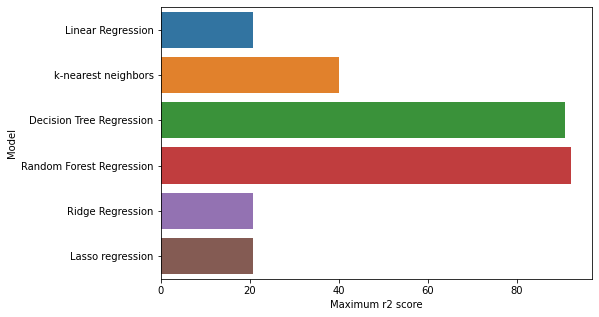

In [97]:
#Plotting bar plot of Maximum r2 scores of various models
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
sns.barplot(x = 'Maximum r2 score', y = 'Model', data = model1)

**Observations:**

After comparing above 6 models, these 2 models are good:-

1- Random Forest Regression (R2 & Cross validation scores are higher & RMSE is minimum & other errors are less.)

2- Decision Tree Regression (R2 score is good & MAE is minimum & also other errors are less.)

**Ensemble Methods**

Ensemble tend to yield better results when there is a significant diversity among the models.Ensemble methods are meta-algorithms that combine several machine learning techniques into one predictive model in order to decrease variance, bias or improve predictions.The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

**ADABoost Regression**

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.
An AdaBoost regression is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [98]:
#Using AdaBoost Regressor to try fitting the regression on our original dataset
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()

**HyperParameter Tuning to find best parameters using Grid Search CV**

In [99]:
parameters={"learning_rate":[0.1,1],"n_estimators":[10,100],"base_estimator":[RandomForestRegressor(),DecisionTreeRegressor()]}
#using GridsearchCV to loop through predefined hyperparameters and fit our estimator on our training set.
gsc=GridSearchCV(abr,parameters,cv=5)
gsc.fit(x1,y)
gsc.best_params_

{'base_estimator': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 100}

**Using best parameters in Adaboost Regression**

In [100]:
#function to calculate max r2score for adaboost regression using DecisionTreeRegressor as best_estimator & random_state=67
def maxr2_score(rgn,x1,y):
    max_r_score =0
    x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=67,test_size=0.20)
    rgn.fit(x_train,y_train)
    y_pred=rgn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=67 #Calculated from decision tree regression
    print('Maximum r2 score for final_r_state',final_r_state,'is',max_r_score)
    return final_r_state

In [101]:
#checking r2 score for ADABoost Regression
abr=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),learning_rate=1,n_estimators=100)
maxr2_score(abr,x1,y)
print('Mean r2 score for ADABoost Regression is:',cross_val_score(abr,x1,y,cv=5,scoring='r2').mean())
print('Standard Deviation in r2 score for ADABoost Regression is:',cross_val_score(abr,x1,y,cv=5,scoring='r2').std())

Maximum r2 score for final_r_state 67 is 0.7175784815761768
Mean r2 score for ADABoost Regression is: 0.026592021220915397
Standard Deviation in r2 score for ADABoost Regression is: 0.4945037073621688


In [102]:
#Cross Validation for ADABoost regression
print(cross_val_score(AdaBoostRegressor(),x1,y,cv=5,scoring="r2"))
print("\nCross validation score is: ",(cross_val_score(abr,x1,y,cv=5,scoring="r2").mean()))
Cvscore.append(((cross_val_score(abr,x1,y,cv=5,scoring="r2").mean()))*100)

[ 2.03687534e-01 -6.07591076e-01 -6.57720675e-04  2.84999286e-01
 -7.81688780e-01]

Cross validation score is:  -0.0027603720440722455


In [103]:
#Score & Error Metrics for ADABoost regression
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=67,test_size=0.20)
y_pred=abr.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score)
Rscore.append(r2score*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
Mse.append(mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
Mae.append(mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)
Rmse.append(rmse)
model.append('ADABoost Regression')

r2_score = 0.7175784815761768
Mean_Squared_Error = 2592028.0250617503
Mean Absolute_Error = 1048.9060369340332
Root Mean Squared Error = 1609.9776473795375


In [104]:
#After using ensemble method,Combining all scores in one place to decide best performing model
model2=pd.DataFrame({})
model2['Model']=model
model2['Maximum r2 score']=Rscore
model2['Cross Validation Score']=Cvscore
model2['Mean absolute error']=Mae
model2['Root Mean Squared Error']=Rmse
model2['Mean squared error']=Mse
model2.round(2)

,Model,Maximum r2 score,Cross Validation Score,Mean absolute error,Root Mean Squared Error,Mean squared error
0,Linear Regression,20.66,-8.86,2043.37,2647.21,7007713.92
1,k-nearest neighbors,39.94,-9.56,1661.67,2403.27,5775703.20
2,Decision Tree Regression,90.84,-31.22,267.27,949.04,900669.88
3,Random Forest Regression,92.21,-9.08,486.27,863.35,745381.49
4,Ridge Regression,20.66,-8.76,2044.11,2647.24,7007875.48
5,Lasso regression,20.65,-8.86,2043.65,2647.40,7008710.78
6,ADABoost Regression,71.76,-3.27,1048.91,1609.98,2592028.03


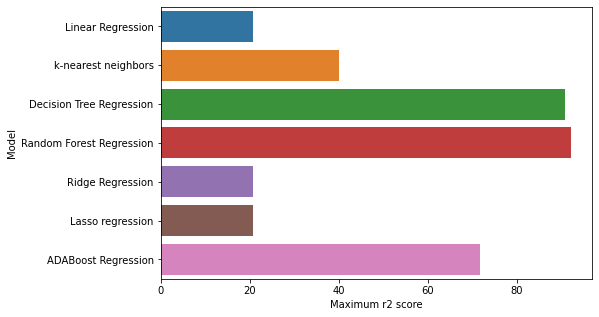

In [105]:
#Plotting bar plot of Maximum r2 scores of various models
plt.figure(figsize=(17,17))

plt.subplot(3,2,1)
sns.barplot(x = 'Maximum r2 score', y = 'Model', data = model2)

**Observations:**

1- After comparing above 7 models on basis of scores and errors, & also after using ensemble methods still these 2 models Random Forest regression & Decision Tree Regression are giving good performance.

2- Adaboost Regression is giving good scores but errors are high so we will not select this option.

3- But when we see all the parameters very carefully and making a final decision about selection then Random Forest regression is the best option because all scores are higher , rmse is less and also other errors are less.

4- Now we are going to do Hyperparameter Tuning for Random Forest regression models using RandomizedSearchCV approach for best model selection so that we will get best results after model implementation.

**Hyperparameter Tuning**

A Machine Learning model is defined as a mathematical model with a number of parameters that need to be learned from the data. By training a model with existing data, we are able to fit the model parameters. However, there is another kind of parameters, known as Hyperparameters, that cannot be directly learned from the regular training process. They are usually fixed before the actual training process begins. These parameters express important properties of the model such as its complexity or how fast it should learn.

Models can have many hyperparameters and finding the best combination of parameters can be treated as a search problem. Two best strategies for Hyperparameter tuning are:

1- GridSearchCV 2- RandomizedSearchCV

**RandomizedSearchCV**

We have already used gridsearchCv to find best parameters for other models in this project. So for our final model RandomForestRegressor we are using RandomizedSearchCV to get best parameters.Using Scikit-Learn’s RandomizedSearchCV method,we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [106]:
#finding best random state for Random Forest regression
r_state=maximumr2_score(rf,x1,y)

Maximum r2 score for final_r_state 78 is 0.7509866461250645


In [107]:
# Using random_grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
random_grid ={'n_estimators': [80,100,200],'max_features': ['sqrt', 'log2','auto'],'max_depth': [None, 5,10],'min_samples_split': [4, 6,10],
          'min_samples_leaf': [1, 2,5]}
# Random search of parameters, using 3 fold cross validation 
# RandomForestRegressor gives best performance at random_state=47
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=47,n_jobs = -1)
# Fitting the random search model
rf_random.fit(x1,y)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 80}

In [108]:
#Using best parameters obtained from RandomizedSearchCV in RandomForestRegressor model
rfc=RandomForestRegressor(n_estimators=80,max_depth=None,min_samples_leaf= 2, max_features= 'sqrt',min_samples_split=10)
print("For RandomForest Regression R2 Score->")
r_state=maximumr2_score(rfc,x1,y)
print('Mean r2 score for Random Forest Regression is:',cross_val_score(rfc,x1,y,cv=5,scoring='r2').mean())
print("\tBest possible r2score is 1.0")
print('Standard deviation in r2 score for Random Forest Regression is',cross_val_score(rfc,x1,y,cv=5,scoring='r2').std())

For RandomForest Regression R2 Score->
Maximum r2 score for final_r_state 57 is 0.7297809512032171
Mean r2 score for Random Forest Regression is: 0.09344512344388871
	Best possible r2score is 1.0
Standard deviation in r2 score for Random Forest Regression is 0.3926416187301187


In [109]:
#Score & Error Metrics for RandomForestRegressor after Hyperparameter Tuning
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=57,test_size=0.20)
y_pred=rfc.predict(x_test)
r2score=r2_score(y_test,y_pred)
print("r2_score =",r2score*100)
print("Cross validation score =",(cross_val_score(abr,x1,y,cv=5,scoring="r2").mean())*100)
mse=mean_squared_error(y_test,y_pred)
print("Mean_Squared_Error =",mse)
mae=mean_absolute_error(y_test,y_pred)
print('Mean Absolute_Error =',mae)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',rmse)

r2_score = 81.32892806761745
Cross validation score = -2.3555466664976477
Mean_Squared_Error = 1605217.404768971
Mean Absolute_Error = 893.1468522109001
Root Mean Squared Error = 1266.9717458447806


**Observation:**

Random Forest Regression gives best performance before HyperParameter Tuning & also after HyperParameter Tuning as compared to other models so we are going to implement Random Forest Regression model in our project.

**Building the model with best parameter**

In [110]:
#We are going to use RandomForest Regressor in this project as it gives best scores at final random state 57.
x_train,x_test,y_train,y_test=train_test_split(x1,y,random_state=57,test_size=0.20)
rfr=RandomForestRegressor(n_estimators=80,max_depth=None,min_samples_leaf= 1, max_features= 'sqrt',min_samples_split=6)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
print(y_pred)

[ 7003.00726416  8438.00622655  6347.3476698   5316.71799829
  6337.58894345  7193.05023313  6392.85045364  8932.42595058
  5887.25202291  6918.39926542 12923.75815476  5568.19380005
  6512.58536255 12987.03292073 14149.94503472  5522.5999504
  5358.71231151  6959.42969034  6048.98910804  6683.1091599
  7438.5914813   6783.84715774  6238.28039953 10742.61345644
  5326.26072691  6774.54120987  5752.56699873  9602.11505547
  5349.12792659  5529.8974256   6759.9068998  12442.95713113
  8646.70200893  7491.87918651  7804.42127525  7754.40590413
  5444.66480311  6919.10050387 13329.27802985  7866.05730575
 12669.17723214  6173.421875    7819.91612644  6687.36327922
  5420.38916171 14505.30347854  6066.71515377  6604.26596681
  5729.46506448  7618.01337527  9100.64011409 10041.31160218
  7889.54522321  8804.69765016  5544.97690483  8988.08079861
 11460.96841135  5387.31383433  6822.35998332  7373.82417749
  7861.82367424 14436.19364087 11249.53913961  9846.60009605
  7121.03083715  6355.5866

In [111]:
print(y_test)

1263     9989.0
488     10188.0
1095     5314.0
1964     5061.0
708      5524.0
         ...   
682     12503.0
382      5735.0
1549     8918.0
1010     6456.0
59      11711.0
Name: Price, Length: 438, dtype: float64


Text(0, 0.5, 'Predcited Values')

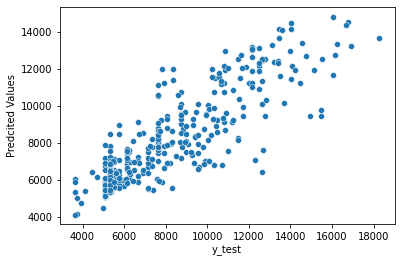

In [112]:
#ScatterPlot between y_test and Predicted values
sns.scatterplot(y_test,y_pred)
plt.xlabel("y_test")
plt.ylabel("Predcited Values")

In [113]:
#Error Metrics & R2Score for our final model
m1=mean_absolute_error(y_test,y_pred)
m2=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error is: ",m1)
print("Mean Squared Error is: ",m2)
print('Root Mean Square Error after model fitting is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Score is:',(rfr.score(x_train,y_train))*100)
print('r2_score after model fitting is:',(r2_score(y_test,y_pred))*100)

Mean Absolute Error is:  1019.6524015621806
Mean Squared Error is:  2164946.0408731606
Root Mean Square Error after model fitting is: 1471.3755607842481
Score is: 86.40849847175596
r2_score after model fitting is: 74.81844942698758


# **Evaluate Predictions**

In [114]:
#lets make the dataframe for Predictions using Pandas
predict=pd.DataFrame(y_pred,columns=['Predicted Values'])
predict=pd.concat([predict,y_test.reset_index()['Price']],axis=1)
predict.columns=['Predicted Values','Real Values']
predict.round(2)

,Predicted Values,Real Values
0,7003.01,9989.0
1,8438.01,10188.0
2,6347.35,5314.0
3,5316.72,5061.0
4,6337.59,5524.0
...,...,...
433,10910.26,12503.0
434,8466.38,5735.0
435,8068.42,8918.0
436,6988.26,6456.0


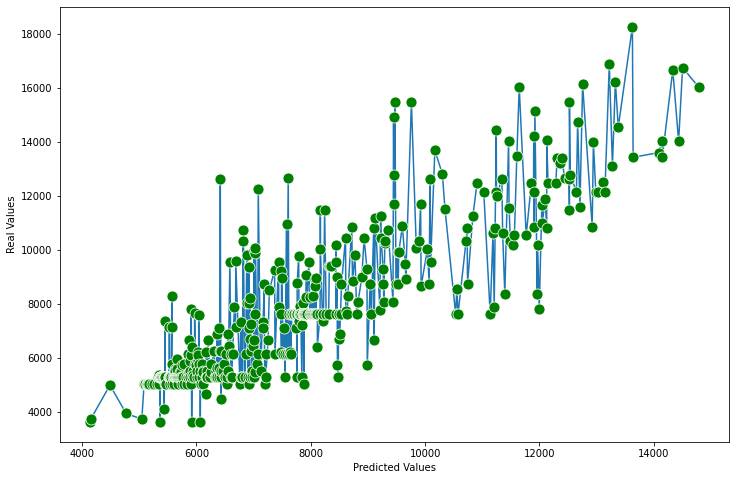

In [115]:
#Graph showing how close are predicted and Real Values
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,8))
sns.lineplot(x='Predicted Values',y='Real Values',data=predict,ax=ax,marker='o',markerfacecolor='green',markersize=11)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Real Values')
plt.show()

**Conclusion**

1- Above Plot shows Predicted values are nearly close to real values.

2- Graph is linear except few deviations and it shows good relation between predicted and real values.

3- R2 Score is best and error is minimum for our selected model.

4- RandomForest Regressor is best selection for this project.

**Saving our model**

In [116]:
import joblib
#saving model
joblib.dump(rfr,'Flight Price- Prediction Project.pkl')

['Flight Price- Prediction Project.pkl']

**Loading the saved model**

In [118]:
eval=joblib.load('Flight Price- Prediction Project.pkl')
eval

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)